In [19]:
import yfinance as yf
import numpy as np
import pandas as pd 
from scipy.stats import shapiro
from scipy.stats import norm
from pylab import mpl, plt
import statsmodels.api as sm
import requests
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def fetch_data(ticker):
    tick = yf.Ticker(ticker)
    df = tick.history(period='max')
    df = df[['Close']]
    df['Returns'] = np.log(df/df.shift(1))
    df.dropna(inplace=True)
    return df

# Visualizing the Normal Distribution

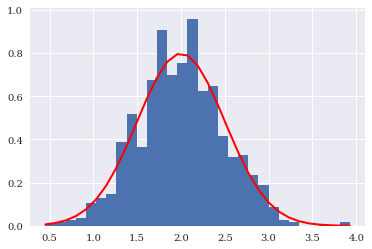

In [21]:
mu, sigma = 2, .5
data = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(data, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

# Filling in Area Under the Curve

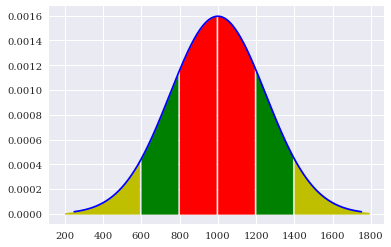

In [38]:
mean=1000
std=250
x=np.linspace(mean-3*std, mean+3*std,1000)
iq=norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

px=np.arange(800,1000,10)
plt.fill_between(px,iq.pdf(px),color='r')

px2 = np.arange(1000, 1200, 10)
plt.fill_between(px2,iq.pdf(px2),color='r')

px3 = np.arange(1200, 1400, 10)
plt.fill_between(px3,iq.pdf(px3),color='g')

px4 = np.arange(600, 800, 10)
plt.fill_between(px4,iq.pdf(px4),color='g')

px5 = np.arange(200, 600, 10)
plt.fill_between(px5,iq.pdf(px5),color='y')

px6 = np.arange(1400, 1800, 10)
plt.fill_between(px6,iq.pdf(px6),color='y')

plt.show()

# Normality Test with Normally Distributed Data: Shapiro-Wilk Test

In [6]:
stat1, p = shapiro(data)
print("Statistics=%.3f, p_value%.3f" % (stat1, p))

if p > 0.05:
    print('Data is Normally distributed')
else:
    print('Data is not Normally distributed')

Statistics=0.999, p_value0.718
Data is Normally distributed


# QQ Plot with Normal Data

Text(0.5, 1.0, 'Sample Data')

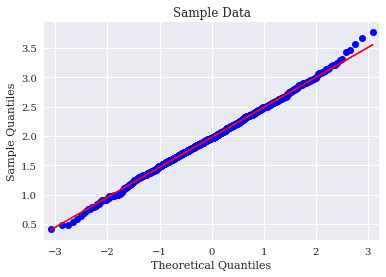

In [7]:
sm.qqplot(data, line='s')
plt.title('Sample Data')

# Graphing Stock Returns

Text(0.5, 1.0, 'Walmart Returns')

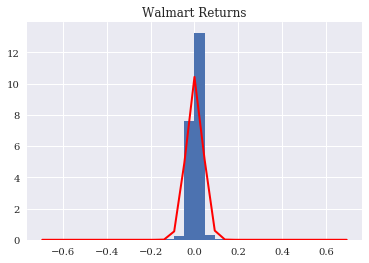

In [7]:
wmt_data = fetch_data('WMT')

#calculate WMT'average return and standard deviation
avg = np.mean(wmt_data['Returns'])
standard_dev = np.std(wmt_data['Returns'])

#graph data
count, bins, ignored = plt.hist(wmt_data['Returns'], 30, density=True)

plt.plot(bins, 1/(standard_dev * np.sqrt(2*np.pi))*np.exp(-(bins-avg)**2/ (2 *standard_dev**2)), linewidth=2,color='r')
plt.title('Walmart Returns')

# Normal Test 1 with Stock Data: Shapiro-Wilk Test

In [11]:
def normal_test2(ticker):
    df = fetch_data(ticker)
    
    stat, p_val = shapiro(df['Returns'])
    
    hypothesis = 0.05
    
    print('Statistics=%.3f, p_value=%.3f' % (stat, p_val))
    if p_val > hypothesis:
        print("Data is normally distributed")
    else:
        print("Data is not normally distributed")

In [43]:
normal_test('aal')

Statistics=0.885, p_value=0.000
Data is not normally distributed


In [16]:
def normal_test2(ticker):
    df = fetch_data(ticker)
    
    stat, p_val = shapiro(df['Returns'])
    p_val = round(p_val)
    #hypothesis = 0.05
    
    return (stat, p_val)
    

# Systematically assessing Normality in the NASDAQ 100

In [18]:
web_data = requests.get('https://en.wikipedia.org/wiki/NASDAQ-100#Changes_in_2020').text
#Put data into Pandas to easily create a list of tickers to loop through
nasdaq_df = pd.read_html(web_data)
#Finds the Wiki table with tickers and stores them in Pandas Data Frame
nasdaq_df = nasdaq_df[3]
#Creates a list of tickers from Data Frame to loop through
nasdaq_tickers = list(nasdaq_df['Ticker'])

nasdaq_test = map(normal_test2, nasdaq_tickers)

output = pd.DataFrame(nasdaq_test, columns=['Statistics', 'P-Value'], index=nasdaq_tickers)
output['P-Value'].value_counts()

0    103
Name: P-Value, dtype: int64

# Normal Test 2 with Stock Data: Quantile-Quantile Plot

In [32]:
def qq_plot(ticker):
    df = fetch_data(ticker)
    sm.qqplot(df['Returns'], line='s')
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')
    plt.title(ticker)

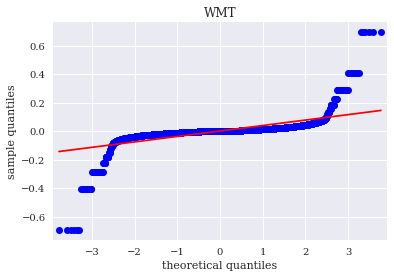

In [33]:
qq_plot('WMT')